In [1]:
import os
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the list of all files and directories
path = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\results\NER\best"
ablation_path = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\results\NER\Ablation"
dir_list = os.listdir(path)
ablation_dir_list = os.listdir(ablation_path)

In [3]:
def read_file(read_in_path):
    #Open the text file for reading
    with open(read_in_path, 'r') as file:
        # Read the content of the file
        content = file.read()

        # Search for the line containing "Test Accuracy:"
        line = content.split('\n')
        for l in line:
            if "Test Accuracy:" in l:
                # Extract the value following "Test Accuracy:"
                accuracy_str = l.split(':')[1].strip()
                # Convert the extracted value to float
                accuracy = float(accuracy_str)
                break

    return accuracy

In [4]:

def create_df(list_of_dir, read_in_path):
    list_of_dfs = []
    for dir in list_of_dir:
        # Get the full path of the file
        file_path = os.path.join(read_in_path, dir)
        if "15" in dir:
            aug_size = 15
        elif "10" in dir:
            aug_size = 10
        elif "5" in dir:
            aug_size = 5
        elif "20" in dir:
            aug_size = 20
        else:
            aug_size = 0

        if "Noise" in dir:
            model = "Noise"
        elif "DCGAN_v2_Text" in dir:
            model = "DCGAN_v2_Text"


        # Read the file
        accuracy = read_file(file_path)

        df = pd.DataFrame([accuracy], columns=["accuracy"])
        df["augmentation_size"] = aug_size
        df["model"] = model

        list_of_dfs.append(df)

    return pd.concat(list_of_dfs)

In [5]:
#create ablation and normal df
df = create_df(dir_list, path)
ablation_df = create_df(ablation_dir_list, ablation_path)


In [6]:
df = df.sort_values(by="augmentation_size")
ablation_df.sort_values(by="augmentation_size")

,accuracy,augmentation_size,model
0,0.5593,0,Noise
0,0.4490,5,Noise
0,0.4031,5,Noise
0,0.5369,5,Noise
0,0.3782,5,Noise
0,0.3127,10,Noise
0,0.5108,10,Noise
0,0.4982,15,Noise
0,0.4712,20,Noise


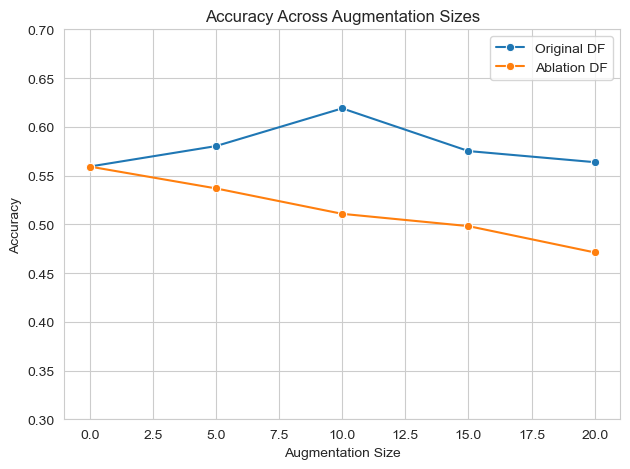

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_accuracy_across_augmentation(df, ablation_df):
    # Set the style of the plot
    sns.set_style("whitegrid")

    # Plot the accuracy scores for the first dataframe
    sns.lineplot(data=df, x='augmentation_size', y='accuracy', label='Original DF', marker='o')

    # Plot the accuracy scores for the second dataframe
    sns.lineplot(data=ablation_df, x='augmentation_size', y='accuracy', label='Ablation DF', marker='o')

    # Set the title and labels
    plt.title('Accuracy Across Augmentation Sizes')
    plt.xlabel('Augmentation Size')
    plt.ylabel('Accuracy')

    # Show legend
    plt.legend()
        # Set the y-axis limits
    plt.ylim(0.3, 0.7)  # Adjust the range as needed

    # Adjust layout to reduce white space
    plt.tight_layout()
    plt.savefig("NER_results.png")
    # Show the plot
    plt.show()

# Assuming df and ablation_df are your dataframes
# Call the function to plot
plot_accuracy_across_augmentation(df, ablation_df)
